# Lesson 1 - Flowers dataset

## Google Colab environment setup for the Fastai course V3

You should re-run the cell below each time you start google colab.

In [5]:
# Set up environment and download course-v3
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai
# !pip uninstall fastai -y
# !git clone https://github.com/fastai/fastai
# !cd fastai; tools/run-after-git-clone; cd ..; pip install -e fastai
!git clone https://github.com/fastai/course-v3
#!git clone https://github.com/marghesc/fastai-v3-training.git

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
spacy 2.0.16 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
spacy 2.0.16 has requirement regex==2018.01.10, but you'll have regex 2018.8.29 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


spacy 2.0.16 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
spacy 2.0.16 has requirement regex==2018.01.10, but you'll have regex 2018.8.29 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
fatal: destination path 'course-v3' already exists and is not an empty directory.


In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from fastai import *
from fastai.vision import *

## Looking at the data

Flowers Kaggle competition
https://www.kaggle.com/alxmamaev/flowers-recognition


In [30]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [40]:
path='/home/marghesc/Datasets/flowers'
path
file_path = glob.glob("/home/marghesc/Datasets/flowers/test/daisy/***.jpg")
file_path

['/home/marghesc/Datasets/flowers/test/daisy/20182559506_40a112f762.jpg',
 '/home/marghesc/Datasets/flowers/test/daisy/18622672908_eab6dc9140_n.jpg',
 '/home/marghesc/Datasets/flowers/test/daisy/18442919723_d1251d3e14_n.jpg',
 '/home/marghesc/Datasets/flowers/test/daisy/2087343668_ef4fb95787_n.jpg',
 '/home/marghesc/Datasets/flowers/test/daisy/20329326505_a777c71cc2.jpg',
 '/home/marghesc/Datasets/flowers/test/daisy/18901817451_43e2b45f6c.jpg',
 '/home/marghesc/Datasets/flowers/test/daisy/18711159980_11d3bd5042.jpg',
 '/home/marghesc/Datasets/flowers/test/daisy/19544831049_0d738d4872_m.jpg',
 '/home/marghesc/Datasets/flowers/test/daisy/18679421522_3be9879e32.jpg',
 '/home/marghesc/Datasets/flowers/test/daisy/20580471306_ab5a011b15_n.jpg',
 '/home/marghesc/Datasets/flowers/test/daisy/19653086178_28156b7ce4_m.jpg',
 '/home/marghesc/Datasets/flowers/test/daisy/19178753159_a471bf4b6b.jpg',
 '/home/marghesc/Datasets/flowers/test/daisy/18023717391_e2c9089e10.jpg',
 '/home/marghesc/Datasets/f

In [41]:
fnames = get_image_files(path_img)
fnames[:5]

[]

In [42]:
data = ImageDataBunch.from_folder(path, 'train', 'valid', ds_tfms=get_transforms(), size=224)

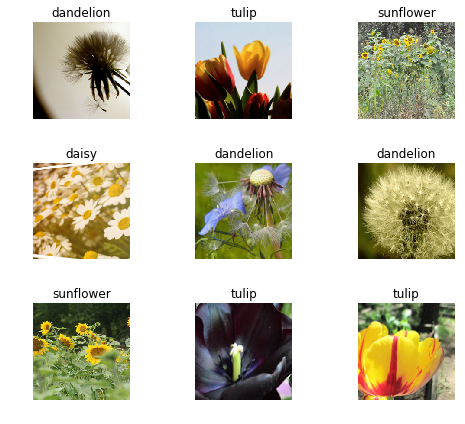

In [43]:
data.show_batch(rows=3, figsize=(7,6))

In [44]:
print(data.classes)
len(data.classes),data.c

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


(5, 5)

## Training: resnet34

In [45]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [39]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate


/home/marghesc/miniconda3/lib/python3.6/site-packages/fastprogress/fastprogress.py:95: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


RuntimeError: expected a non-empty list of Tensors

In [0]:
learn.save('stage-1')


## Results


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interp.plot_top_losses)

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)


## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will unfreeze our model and train some more.


In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

In [0]:
learn.load('stage-1')

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))